In [1]:
import numpy as np
import pandas as pd

import sage.plot.scatter_plot as scatter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plotTangent(equation):
    deq = equation.derivative(x)
    
    x_data = np.linspace(0, 100, num=50)
    
    # Makes the equation callable
    func = fast_callable(equation, vars=[x])
    slope = fast_callable(deq, vars=[x])
    
    # Plotting the function
    plots = [ (x_data[i], func(x_data[i])) for i in range(len(x_data)) ]
    
    g = Graphics()
    g += scatter.scatter_plot(plots, facecolor='lime')
    
    # Plotting the tangent lines
    p = Graphics()
    data = []
    for i in range(0, len(x_data), 5):
        x0 = x_data[i]
        y0 = func(x_data[i])
        s = slope(x_data[i])

        points = [ (x, y0+s*(x-x0)) for x in [0, x0-y0/s, x0, x0*10] ]
        p += line(points)
        data.append({ "Coordinates": [x0,y0] ,"Slope": s, "X-Intercept": x0-y0/s, "Y-Intercept": y0-s*x0})
        
    mini = min(func(x_data[0]), func(x_data[-1]))
    maxi = max(func(x_data[0]), func(x_data[-1]))
    
    g.save("Plotted.png", axes_labels=['$x$','f($x$)'])
    p.save("Tangents.png", axes_labels=['$x$','f($x$)'], xmin=0, xmax=100, ymin=mini, ymax=maxi)
    
    return p, g, data

In [3]:
p, g, data = plotTangent(0.01*x^2)

<ipython-input-2-65462b953e8f>:24: RuntimeWarning: invalid value encountered in double_scalars
  points = [ (x, y0+s*(x-x0)) for x in [Integer(0), x0-y0/s, x0, x0*Integer(10)] ]
<ipython-input-2-65462b953e8f>:26: RuntimeWarning: invalid value encountered in double_scalars
  data.append({ "Coordinates": [x0,y0] ,"Slope": s, "X-Intercept": x0-y0/s, "Y-Intercept": y0-s*x0})


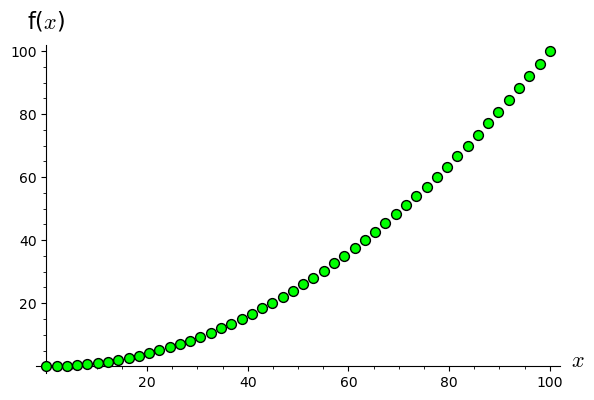

In [4]:
g.show()

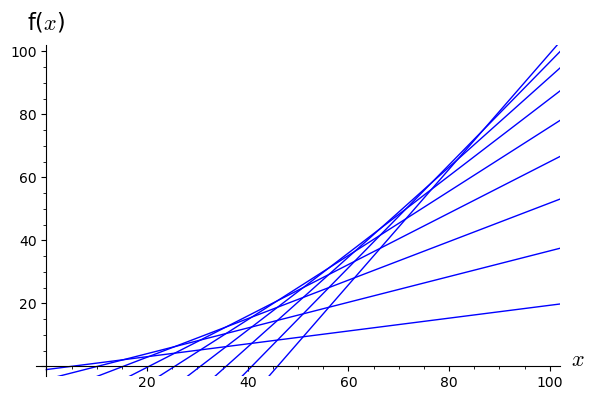

In [5]:
p.show(xmin=0, xmax=100, ymin=-1, ymax=100)

In [6]:
data = pd.DataFrame(data)

In [7]:
data

,Coordinates,Slope,X-Intercept,Y-Intercept
0,"[0.0, 0.0]",0.000000,NaN,0.000000
1,"[10.204081632653061, 1.0412328196584755]",0.204082,5.102041,-1.041233
2,"[20.408163265306122, 4.164931278633902]",0.408163,10.204082,-4.164931
3,"[30.612244897959183, 9.37109537692628]",0.612245,15.306122,-9.371095
4,"[40.816326530612244, 16.659725114535608]",0.816327,20.408163,-16.659725
5,"[51.02040816326531, 26.030820491461895]",1.020408,25.510204,-26.030820
6,"[61.224489795918366, 37.48438150770512]",1.224490,30.612245,-37.484382
7,"[71.42857142857143, 51.02040816326531]",1.428571,35.714286,-51.020408
8,"[81.63265306122449, 66.63890045814243]",1.632653,40.816327,-66.638900
9,"[91.83673469387756, 84.33985839233654]",1.836735,45.918367,-84.339858
